# Ejercicio 2

## a)
 Si el **curr_hp** es más chico, entonces el término *(**max_hp** * 3 - **curr_hp** * 2)* en la expresión del numerador será más grande, lo que hará que el valor del numerador en general sea más grande. Esto, a su vez, aumentará el valor de **capture_rate**.

Por lo tanto, si curr_hp es más chico, es más probable que se capture al pokemon si se mantienen constantes los demás factores (como el **catch_rate**, **ball_rate**, **status**, **noise**, etc.). Sin embargo, es importante tener en cuenta que el efecto del **curr_hp** en la tasa de captura puede ser mitigado por otros factores en la expresión, como el **catch_rate**, **ball_rate**, **status**, etc.

## b)

Lo mencionado en el punto a) lo podremos ver a través de un gráfico de barras que comparara la posibilidad de capturar los pokemones MewTwo, Onix y Caterpie, utilizando los porcentajes de vida [0.2, 0.4, 0.6, 0.8, 1].
Los valores que no sean la vida de los mismos se mantendrán constantes, y todo se realizará con la pokeball estándar para que no influyan otros factores.

Se utilizaran MewTwo y Caterpie, pues son los valores extremos en cuanto a posibilidad de ser atrapados, y Onix como un valor intermedio entre ambos.

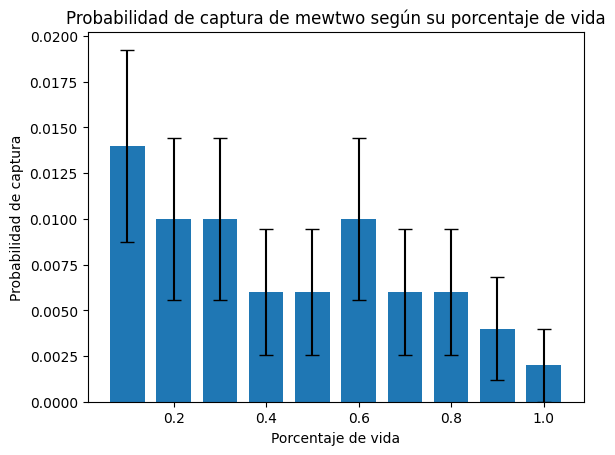

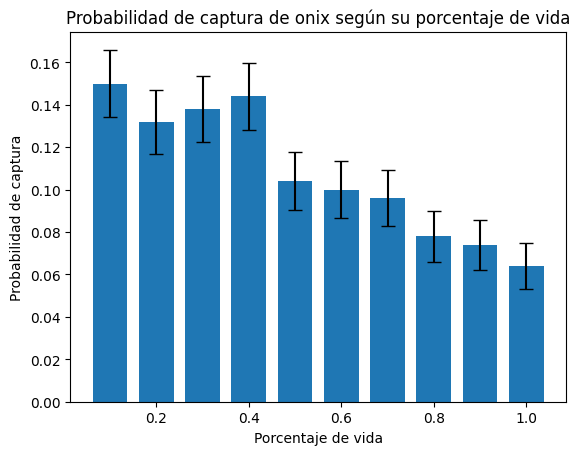

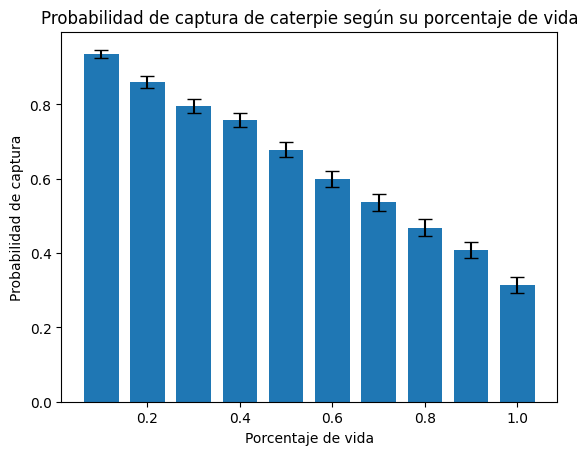

In [126]:
from src.catching import attempt_catch
from src.pokemon import PokemonFactory, StatusEffect
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json

factory = PokemonFactory("pokemon.json")
healths = np.arange(0.1,1.1,0.1)
poke_names = ['mewtwo', 'onix', 'caterpie']

for poke_name in poke_names:
    capture_rates = []
    std_errors = []
    for health in healths:
        capture_attempts = []
        current_poke = factory.create(poke_name, 100, StatusEffect.NONE, health)
        for i in range(500):
            capture_attempts.append(attempt_catch(current_poke, "pokeball")[0])
    
        capture_rate = sum(capture_attempts) / len(capture_attempts)
        capture_rates.append(capture_rate)
        std_error = np.std(capture_attempts) / np.sqrt(len(capture_attempts))
        std_errors.append(std_error)
    
    #Creamos el data frame donde almacenamos todos los datos que se van a graficar
    data = pd.DataFrame({'health': healths, 'capture_rate': capture_rates})

    #Creamos el grafico de barras con las respectivas barras de errores
    plt.bar(data['health'], data['capture_rate'], yerr=std_errors, capsize=5, width=0.075)
    plt.title(f'Probabilidad de captura de {poke_name} según su porcentaje de vida')
    plt.xlabel('Porcentaje de vida')
    plt.ylabel('Probabilidad de captura')
    plt.show()

Como se puede apreciar en los gráficos, se ve como la tasa de captura desciende a medida que el porcentaje de salud crece.

En el caso de MewTwo los valores no descienden de manera constante debido a su bajo catch_rate, pero en los otros dos pokemones 
elegidos, se ve una tendencia más lineal en los porcentajes de captura, validando lo expresado en el punto 2.a).

## c)
En el archivo catching.py podemos ver la siguiente ecuación que es la encargada de en última instancia devolver la posibilidad de que se capture o no un pokemon, en este caso ignorando el noise_multiplier que únicamente agrega mayor aleatoreidad a la ecuación.

Real max hp formula includes EVs and IVs, this is a simplification
max_hp = math.floor(0.01 * (2 * base_hp) + level + 10)

round(((1 + (max_hp * 3 - curr_hp * 2) * catch_rate * ball_rate * status) / ( max_hp * 3)) / 256, 4)

Sabiendo que la ball_rate es independiente de parámetros del pokemon, suponer que los valores que más determinan si este es o no capturado son: max_hp, curr_hp y status. A su vez, sabemos que la variable max_hp se encuentra determinada por la base_hp del pokemon y su nivel. 

En los puntos a) y b) se vio como el porcentaje de salud afecta la posibilidad de captura. 

Ahora veremos como el nivel y la base_hp (y por lo tanto la max_hp) afecta el porcentaje de captura. Para eso usaremos a Jolteon y Onix de ejemplos, ya que su catch_rate es igual pero su base_hp es de 35 y 65 respectivamente. Nuevamente, usaremos la pokeball estándar para evitar que influya en los valores de captura.

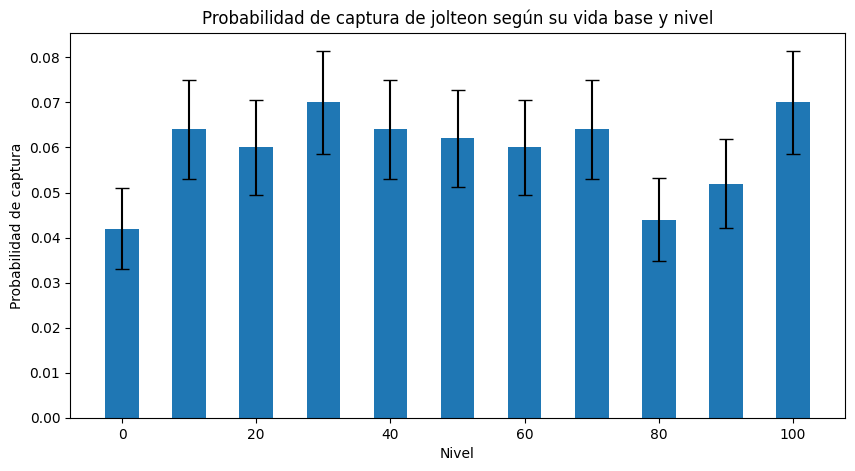

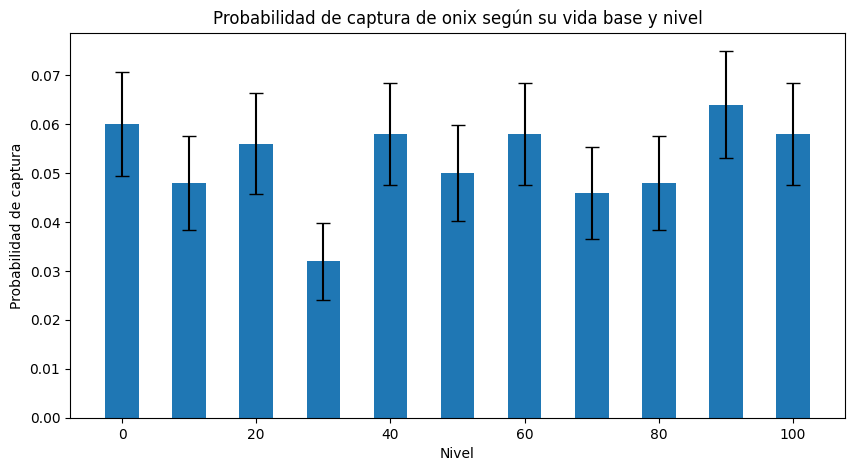

In [127]:
levels = np.arange(0,101,10)
poke_names = ['jolteon', 'onix']
for poke_name in poke_names:
    capture_rates = []
    std_errors = []
    for level in levels:
        capture_attempts = []
        current_poke = factory.create(poke_name, level, StatusEffect.NONE, 1)
        for i in range(500):
            capture_attempts.append(attempt_catch(current_poke, "pokeball")[0])
    
        capture_rate = sum(capture_attempts) / len(capture_attempts)
        capture_rates.append(capture_rate)
        std_error = np.std(capture_attempts) / np.sqrt(len(capture_attempts))
        std_errors.append(std_error)
    
    #Creamos el data frame donde almacenamos todos los datos que se van a graficar
    data = pd.DataFrame({'level': levels, 'capture_rate': capture_rates})

    #Creamos el grafico de barras con las respectivas barras de errores
    plt.figure(figsize=(10, 5))
    plt.bar(data['level'], data['capture_rate'], yerr=std_errors, capsize=5, width=5)
    plt.title(f'Probabilidad de captura de {poke_name} según su vida base y nivel')
    plt.xlabel('Nivel')
    plt.ylabel('Probabilidad de captura')
    plt.show()

Contrario a lo que supusimos, el nivel y la base_hp no afectaron realmente el porcentaje de captura a lo largo de los distintos niveles de un mismo pokemon. Esto se debe a que como no se modifica el current_hp, estos términos de la ecuación se mantienen casi constantes a medida que el nivel aumenta:
(max_hp * 3 - curr_hp * 2),  ( max_hp * 3).

Sin embargo se puede apreciar que la posibilidad de atrapar a Jolteon es, en promedio, superior a la de Onix, ya que la base_hp del primero es menor.

Por último, falta probar como es que los distintos status posibles afectan el porcentaje de captura. Usaremos para ello los status NONE, PARALYSIS y SLEEP, que afectan en 1, 1.5 y 2 respectivamente el porcentaje de captura. Haremos la prueba con Jolteon y Onix de nivel 100 y pokeball estándar.

TypeError: the dtypes of parameters x (object) and width (int32) are incompatible

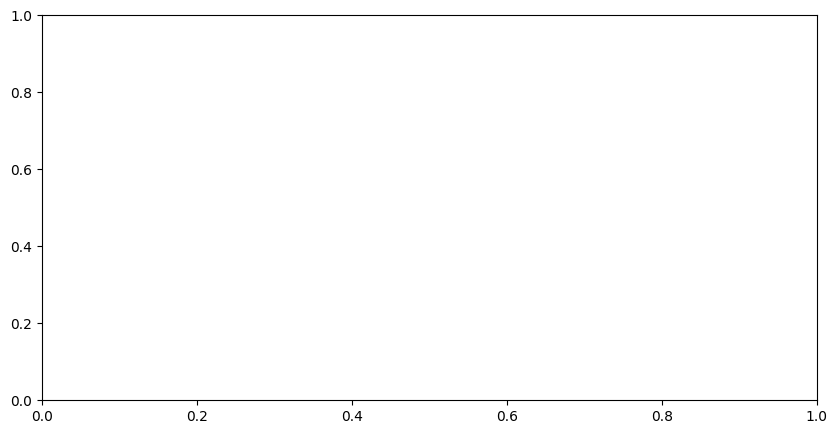

In [128]:
poke_names = ['jolteon', 'onix']
status_array = [StatusEffect.NONE, StatusEffect.PARALYSIS, StatusEffect.SLEEP]
for poke_name in poke_names:
    capture_rates = []
    std_errors = []
    for status in status_array:
        capture_attempts = []
        current_poke = factory.create(poke_name, 100, status, 1)
        for i in range(500):
            capture_attempts.append(attempt_catch(current_poke, "pokeball")[0])
    
        capture_rate = sum(capture_attempts) / len(capture_attempts)
        capture_rates.append(capture_rate)
        std_error = np.std(capture_attempts) / np.sqrt(len(capture_attempts))
        std_errors.append(std_error)
    
    #Creamos el data frame donde almacenamos todos los datos que se van a graficar
    data = pd.DataFrame({'status': status, 'capture_rate': capture_rates})

    #Creamos el grafico de barras con las respectivas barras de errores
    plt.figure(figsize=(10, 5))
    plt.bar(data['status'], data['capture_rate'], yerr=std_errors, capsize=5, width=5)
    plt.title(f'Probabilidad de captura de {poke_name} según su status')
    plt.xlabel('Status')
    plt.ylabel('Probabilidad de captura')
    plt.show()